# 豆瓣电影TOP250数据分析

## 数据导入

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
df = pd.read_csv("top250_movie.csv",encoding = 'utf-8')
df

,0,名称,年份,国家,类型,导演,评价人数,评分
0,1,肖申克的救赎,1994,美国,犯罪 剧情,弗兰克·德拉邦特 Frank Darabont,1111833,9.6
1,2,霸王别姬,1993,中国大陆 香港,剧情 爱情 同性,陈凯歌 Kaige Chen,811410,9.5
2,3,这个杀手不太冷,1994,法国,剧情 动作 犯罪,吕克·贝松 Luc Besson,1030489,9.4
3,4,阿甘正传,1994,美国,剧情 爱情,Robert Zemeckis,878944,9.4
4,5,美丽人生,1997,意大利,剧情 喜剧 爱情 战争,罗伯托·贝尼尼 Roberto Benigni,513037,9.5
5,6,泰坦尼克号,1997,美国,剧情 爱情 灾难,詹姆斯·卡梅隆 James Cameron,817615,9.3
6,7,千与千寻,2001,日本,剧情 动画 奇幻,宫崎骏 Hayao Miyazaki,818349,9.3
7,8,辛德勒的名单,1993,美国,剧情 历史 战争,史蒂文·斯皮尔伯格 Steven Spielberg,464382,9.4
8,9,盗梦空间,2010,美国 英国,剧情 科幻 悬疑 冒险,克里斯托弗·诺兰 Christopher Nolan,906557,9.3
9,10,机器人总动员,2008,美国,爱情 科幻 动画 冒险,安德鲁·斯坦顿 Andrew Stanton,597466,9.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
0       250 non-null int64
名称      250 non-null object
年份      250 non-null object
国家      250 non-null object
类型      250 non-null object
导演      250 non-null object
评价人数    250 non-null int64
评分      250 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 15.7+ KB


## 重复值检查  

In [4]:
df.duplicated().value_counts()

False    250
dtype: int64

In [5]:
len(df.名称.unique())

250

从结果可以看出，没有重复项也没有重名的电影。

## 电影上映年份分析

In [6]:
df["年份"].value_counts()

2010                                                 13
2004                                                 12
1994                                                 11
2001                                                 11
2009                                                 10
2013                                                 10
2008                                                 10
2011                                                 10
2006                                                  9
1997                                                  9
2014                                                  9
2003                                                  8
1999                                                  8
1995                                                  8
2002                                                  8
2015                                                  8
1993                                                  7
2000                                            

注意：value_counts()是Series的方法，DataFrame()并没有这个方法。

<function matplotlib.pyplot.show>

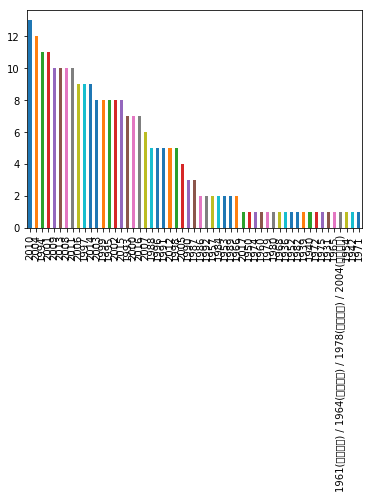

In [10]:
df["年份"].value_counts().plot.bar()
plt.show

## 电影制作国家分析  
需要注意的是，有些电影由多个国家或地区联合制作的。

In [13]:
country = df["国家"].str.split(' ')
country

0                        [美国]
1                  [中国大陆, 香港]
2                        [法国]
3                        [美国]
4                       [意大利]
5                        [美国]
6                        [日本]
7                        [美国]
8                    [美国, 英国]
9                        [美国]
10                   [美国, 英国]
11                       [印度]
12                      [意大利]
13               [法国, 瑞士, 德国]
14                 [香港, 中国大陆]
15                       [美国]
16                       [美国]
17                       [日本]
18          [美国, 英国, 加拿大, 冰岛]
19                       [韩国]
20                       [香港]
21                       [法国]
22                       [美国]
23                       [美国]
24                       [美国]
25                  [意大利, 法国]
26                       [美国]
27                       [美国]
28                   [美国, 英国]
29                     [中国大陆]
                ...          
220                      [美国]
221                      [美国]
222       

In [20]:
country = df["国家"].str.split(' ',expand = True)
country

,0,1,2,3,4
0,美国,None,None,None,None
1,中国大陆,香港,None,None,None
2,法国,None,None,None,None
3,美国,None,None,None,None
4,意大利,None,None,None,None
5,美国,None,None,None,None
6,日本,None,None,None,None
7,美国,None,None,None,None
8,美国,英国,None,None,None
9,美国,None,None,None,None


我们可以看到，有些国家甚至有5个国家或地区参与制作，对于这么多的空值，可以通过先按列计数，将空值 NaN 替换为“0”，再按行汇总。我们统计每个区域里相同国家的总数。

In [22]:
country = country.apply(pd.value_counts).fillna(0)
country

,0,1,2,3,4
中国大陆,11.0,5.0,0.0,0.0,0.0
丹麦,1.0,0.0,0.0,0.0,0.0
伊朗,2.0,0.0,0.0,0.0,0.0
冰岛,0.0,0.0,0.0,1.0,0.0
加拿大,0.0,5.0,1.0,1.0,0.0
南非,0.0,2.0,0.0,0.0,0.0
博茨瓦纳,1.0,0.0,0.0,0.0,0.0
印度,4.0,0.0,0.0,0.0,0.0
台湾,5.0,2.0,0.0,0.0,0.0
奥地利,0.0,1.0,0.0,0.0,0.0
